#第2章：神經網路的數學概念

## 0201：MNIST手寫辨識

#### 在Keras中載入MNIST資料集

In [1]:
from tensorflow import keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#### 查看資料集的結構及資料大小

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

5


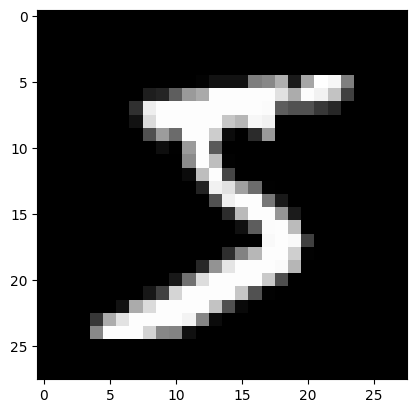

In [5]:
from matplotlib import pyplot as plt

plt.imshow(train_images[0], cmap='gray')
print(train_labels[0])

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#### 神經網路架構

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="sigmoid"),
    # layers.Dense(1024, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

#### 編譯步驟

In [10]:
import tensorflow as tf

model.compile(optimizer="sgd",
       loss="sparse_categorical_crossentropy",
       # loss='mean_squared_error',
       metrics=["accuracy"])

#### 準備圖片資料

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [12]:
model.build(input_shape=(None, 28 * 28))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=128,
    layer_range=None,
    show_layer_activations=True
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


#### 訓練神經網路模型

In [14]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 1s 3ms/step - loss: 2.0244 - accuracy: 0.5110 - val_loss: 1.7467 - val_accuracy: 0.6970
Epoch 2/5
375/375 [==============================] - 1s 2ms/step - loss: 1.5368 - accuracy: 0.7340 - val_loss: 1.3187 - val_accuracy: 0.7906
Epoch 3/5
375/375 [==============================] - 1s 3ms/step - loss: 1.1924 - accuracy: 0.7866 - val_loss: 1.0341 - val_accuracy: 0.8185
Epoch 4/5
375/375 [==============================] - 1s 2ms/step - loss: 0.9698 - accuracy: 0.8132 - val_loss: 0.8556 - val_accuracy: 0.8403
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.8275 - accuracy: 0.8312 - val_loss: 0.7391 - val_accuracy: 0.8533


#### 使用模型來進行預測

In [15]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 41ms/step


array([0.00640091, 0.00357047, 0.00619968, 0.01170884, 0.01623418,
       0.01394313, 0.00226917, 0.85779184, 0.00704227, 0.0748395 ],
      dtype=float32)

7


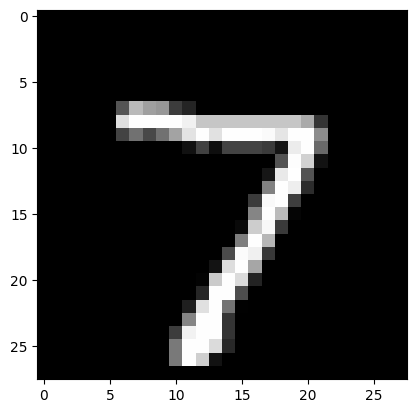

In [16]:
print(predictions[0].argmax())
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')

In [17]:
predictions[0][7]

0.85779184

In [18]:
test_labels[0]

7

####  評估模型在測試集上的表現

In [19]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"acc: {accuracy}")

313/313 [==============================] - 0s 632us/step - loss: 0.7450 - accuracy: 0.8474
acc: 0.8474000096321106


In [20]:
history.history

{'loss': [2.0243754386901855,
  1.5368092060089111,
  1.1924166679382324,
  0.9698410034179688,
  0.8274675011634827],
 'accuracy': [0.5110416412353516,
  0.7339583039283752,
  0.7866041660308838,
  0.8132291436195374,
  0.8311874866485596],
 'val_loss': [1.7466962337493896,
  1.3187487125396729,
  1.034091591835022,
  0.8555606007575989,
  0.7390850186347961],
 'val_accuracy': [0.6970000267028809,
  0.7905833125114441,
  0.8184999823570251,
  0.8402500152587891,
  0.8532500267028809]}

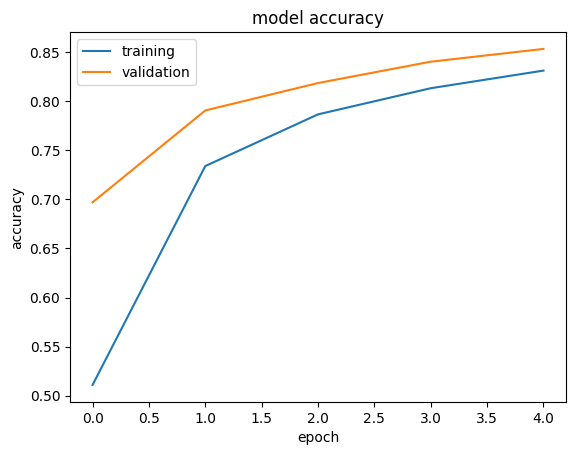

Test loss: 0.745
Test accuracy: 0.847


In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')